# Context Encoder GAN

In [127]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

## Build the discriminator

In [115]:
class Discriminator(tf.keras.Model):
    def __init__(self, **kwargs):
        super(Discriminator, self).__init__(name='Discriminator', **kwargs)
        self.conv2d_1 = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same")
        self.leaky_relu_1 = tf.keras.layers.LeakyReLU(alpha=.2)
        self.batch_norm_1 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.conv2d_2 = tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same")
        self.leaky_relu_2 = tf.keras.layers.LeakyReLU(alpha=.2)
        self.batch_norm_2 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.conv2d_3 = tf.keras.layers.Conv2D(256, kernel_size=3, strides=2, padding="same")
        self.leaky_relu_3 = tf.keras.layers.LeakyReLU(alpha=.2)
        self.batch_norm_3 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, input_tensor, training=False):
        x = self.conv2d_1(input_tensor)
        x = self.leaky_relu_1(x)
        x = self.batch_norm_1(x, training=training)
        
        x = self.conv2d_2(x)
        x = self.leaky_relu_2(x)
        x = self.batch_norm_2(x, training=training)
        
        x = self.conv2d_3(x)
        x = self.leaky_relu_3(x)
        x = self.batch_norm_3(x, training=training)
        
        x = self.flatten(x)
        return self.dense(x)

## Build the generator

In [97]:
class Encoder(tf.keras.Model):
    def __init__(self):
        super(Encoder, self).__init__(name='Encoder')
        self.conv2d_1 = tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding="same")
        self.leaky_relu_1 = tf.keras.layers.LeakyReLU(alpha=0.2)
        self.batch_norm_1 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.conv2d_2 = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same")
        self.leaky_relu_2 = tf.keras.layers.LeakyReLU(alpha=0.2)
        self.batch_norm_2 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.conv2d_3 = tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same")
        self.leaky_relu_3 = tf.keras.layers.LeakyReLU(alpha=0.2)
        self.batch_norm_3 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.conv2d_4 = tf.keras.layers.Conv2D(512, kernel_size=1, strides=2, padding="same")
        self.leaky_relu_4 = tf.keras.layers.LeakyReLU(alpha=0.2)
        self.dropout = tf.keras.layers.Dropout(.5)
        
    def call(self, input_tensor, training=False):
        x = self.conv2d_1(input_tensor)
        x = self.leaky_relu_1(x)
        x = self.batch_norm_1(x, training=training)
            
        x = self.conv2d_2(x)
        x = self.leaky_relu_2(x)
        x = self.batch_norm_2(x, training=training)
        
        x = self.conv2d_3(x)
        x = self.leaky_relu_3(x)
        x = self.batch_norm_3(x, training=training)
            
        x = self.conv2d_4(x)
        x = self.leaky_relu_4(x)
        return self.dropout(x)
    
    def compute_output_shape(self, input_shape):
        # You need to override this function if you want to use the subclassed model
        # as part of a functional-style model.
        # Otherwise, this method is optional.
        shape = tf.TensorShape(input_shape).as_list()
        return tf.TensorShape(shape)

In [72]:
class Decoder(tf.keras.Model):
    def __init__(self, channels=3):
        super(Decoder, self).__init__(name='Decoder')
        self.up_1 = tf.keras.layers.UpSampling2D()
        self.conv2d_1 = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="same")
        self.batch_norm_1 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.up_2 = tf.keras.layers.UpSampling2D()
        self.conv2d_2 = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding="same")
        self.batch_norm_2 = tf.keras.layers.BatchNormalization(momentum=0.8)
        
        self.conv2d_3 = tf.keras.layers.Conv2D(channels, kernel_size=3, padding="same", activation='tanh')
    
    def call(self, input_tensor, training=False):
        x = self.up_1(input_tensor)
        x = self.conv2d_1(x)
        x = self.batch_norm_1(x, training=training)
            
        x = self.up_2(x)
        x = self.conv2d_2(x)
        x = self.batch_norm_2(x, training=training)
        
        return self.conv2d_3(x)

In [75]:
class Generator(tf.keras.Model):
    def __init__(self, encoder, decoder):
        super(Generator, self).__init__(name='Generator')
        self.encoder = encoder
        self.decoder = decoder
    
    def call(self, input_tensor, training=False):
        x = self.encoder(input_tensor, training=training)
        return self.decoder(x, training=training)

W0410 23:57:28.394125  8624 training.py:2131] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0410 23:57:34.216833  8624 training.py:2131] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


0 [D loss: 0.841448, acc: 52.34%] [G loss: 0.717190, mse: 0.717054]


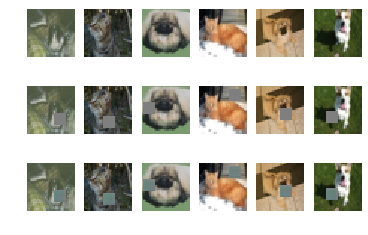

1 [D loss: 0.890881, acc: 43.75%] [G loss: 0.637323, mse: 0.637075]
2 [D loss: 0.872596, acc: 53.12%] [G loss: 0.674362, mse: 0.674166]
3 [D loss: 0.890452, acc: 53.91%] [G loss: 0.627592, mse: 0.627384]
4 [D loss: 0.829390, acc: 46.88%] [G loss: 0.641767, mse: 0.641590]
5 [D loss: 0.785269, acc: 50.00%] [G loss: 0.592052, mse: 0.591859]
6 [D loss: 0.762438, acc: 50.78%] [G loss: 0.538179, mse: 0.537862]
7 [D loss: 0.747526, acc: 47.66%] [G loss: 0.545054, mse: 0.544808]
8 [D loss: 0.749029, acc: 46.88%] [G loss: 0.521442, mse: 0.521150]
9 [D loss: 0.741161, acc: 42.97%] [G loss: 0.595983, mse: 0.595815]
10 [D loss: 0.745375, acc: 50.00%] [G loss: 0.483169, mse: 0.482876]
11 [D loss: 0.765665, acc: 47.66%] [G loss: 0.493809, mse: 0.493491]
12 [D loss: 0.740926, acc: 52.34%] [G loss: 0.454989, mse: 0.454678]
13 [D loss: 0.740383, acc: 53.12%] [G loss: 0.487058, mse: 0.486779]
14 [D loss: 0.751256, acc: 46.09%] [G loss: 0.426161, mse: 0.425799]
15 [D loss: 0.748067, acc: 48.44%] [G loss:

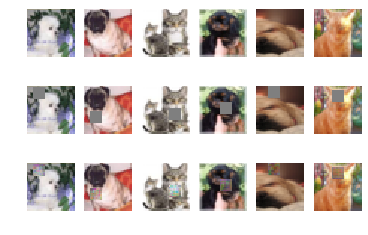

51 [D loss: 0.707224, acc: 48.44%] [G loss: 0.236451, mse: 0.235970]
52 [D loss: 0.711504, acc: 49.22%] [G loss: 0.245550, mse: 0.245085]
53 [D loss: 0.713808, acc: 56.25%] [G loss: 0.204716, mse: 0.204206]
54 [D loss: 0.705861, acc: 47.66%] [G loss: 0.256148, mse: 0.255690]
55 [D loss: 0.707750, acc: 48.44%] [G loss: 0.255069, mse: 0.254611]
56 [D loss: 0.715625, acc: 51.56%] [G loss: 0.218651, mse: 0.218154]
57 [D loss: 0.711430, acc: 46.09%] [G loss: 0.230076, mse: 0.229591]
58 [D loss: 0.707142, acc: 54.69%] [G loss: 0.231873, mse: 0.231393]
59 [D loss: 0.709529, acc: 50.78%] [G loss: 0.198562, mse: 0.198060]
60 [D loss: 0.702210, acc: 48.44%] [G loss: 0.217821, mse: 0.217330]
61 [D loss: 0.701970, acc: 53.91%] [G loss: 0.229775, mse: 0.229300]
62 [D loss: 0.702754, acc: 49.22%] [G loss: 0.202208, mse: 0.201703]
63 [D loss: 0.705707, acc: 42.97%] [G loss: 0.199990, mse: 0.199483]
64 [D loss: 0.703064, acc: 53.12%] [G loss: 0.226096, mse: 0.225618]
65 [D loss: 0.702464, acc: 48.44%]

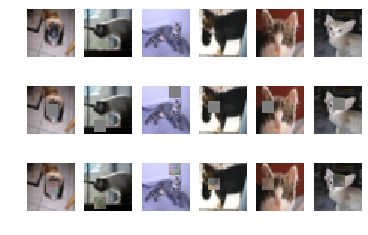

101 [D loss: 0.698187, acc: 47.66%] [G loss: 0.215863, mse: 0.215383]
102 [D loss: 0.700191, acc: 45.31%] [G loss: 0.218837, mse: 0.218356]
103 [D loss: 0.703747, acc: 47.66%] [G loss: 0.195976, mse: 0.195466]
104 [D loss: 0.700592, acc: 53.91%] [G loss: 0.263489, mse: 0.263055]
105 [D loss: 0.710373, acc: 55.47%] [G loss: 0.238329, mse: 0.237859]
106 [D loss: 0.704813, acc: 50.00%] [G loss: 0.205260, mse: 0.204765]
107 [D loss: 0.701117, acc: 49.22%] [G loss: 0.215321, mse: 0.214838]
108 [D loss: 0.699241, acc: 52.34%] [G loss: 0.255433, mse: 0.254989]
109 [D loss: 0.697742, acc: 50.00%] [G loss: 0.185970, mse: 0.185457]
110 [D loss: 0.698522, acc: 47.66%] [G loss: 0.223486, mse: 0.223012]
111 [D loss: 0.698362, acc: 45.31%] [G loss: 0.184077, mse: 0.183565]
112 [D loss: 0.698312, acc: 53.12%] [G loss: 0.211336, mse: 0.210849]
113 [D loss: 0.697732, acc: 51.56%] [G loss: 0.187272, mse: 0.186760]
114 [D loss: 0.699435, acc: 44.53%] [G loss: 0.190040, mse: 0.189534]
115 [D loss: 0.69902

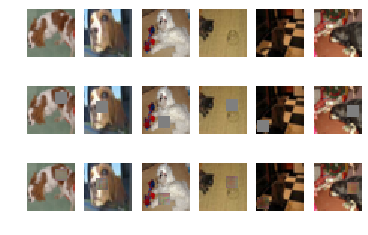

151 [D loss: 0.696311, acc: 55.47%] [G loss: 0.225480, mse: 0.225010]
152 [D loss: 0.698119, acc: 52.34%] [G loss: 0.187838, mse: 0.187330]
153 [D loss: 0.696452, acc: 56.25%] [G loss: 0.207506, mse: 0.207016]
154 [D loss: 0.697049, acc: 49.22%] [G loss: 0.220299, mse: 0.219823]
155 [D loss: 0.696071, acc: 49.22%] [G loss: 0.171847, mse: 0.171323]
156 [D loss: 0.697092, acc: 50.00%] [G loss: 0.207109, mse: 0.206620]
157 [D loss: 0.696614, acc: 50.78%] [G loss: 0.210747, mse: 0.210261]
158 [D loss: 0.696591, acc: 52.34%] [G loss: 0.195229, mse: 0.194729]
159 [D loss: 0.696584, acc: 51.56%] [G loss: 0.224524, mse: 0.224053]
160 [D loss: 0.696259, acc: 43.75%] [G loss: 0.202227, mse: 0.201732]
161 [D loss: 0.697009, acc: 44.53%] [G loss: 0.213536, mse: 0.213054]
162 [D loss: 0.695161, acc: 51.56%] [G loss: 0.183685, mse: 0.183173]
163 [D loss: 0.696588, acc: 52.34%] [G loss: 0.215765, mse: 0.215286]
164 [D loss: 0.696250, acc: 55.47%] [G loss: 0.167150, mse: 0.166621]
165 [D loss: 0.69635

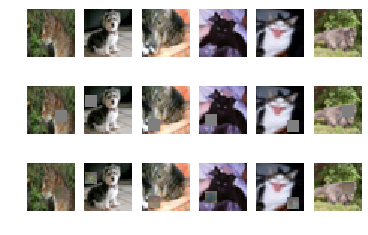

201 [D loss: 0.695627, acc: 49.22%] [G loss: 0.235747, mse: 0.235287]
202 [D loss: 0.695323, acc: 51.56%] [G loss: 0.179153, mse: 0.178638]
203 [D loss: 0.695304, acc: 48.44%] [G loss: 0.213550, mse: 0.213069]
204 [D loss: 0.695534, acc: 52.34%] [G loss: 0.204292, mse: 0.203802]
205 [D loss: 0.695955, acc: 45.31%] [G loss: 0.263089, mse: 0.262657]
206 [D loss: 0.695536, acc: 50.78%] [G loss: 0.224986, mse: 0.224517]
207 [D loss: 0.695511, acc: 53.12%] [G loss: 0.207778, mse: 0.207290]
208 [D loss: 0.696183, acc: 53.91%] [G loss: 0.210457, mse: 0.209972]
209 [D loss: 0.695697, acc: 46.09%] [G loss: 0.214805, mse: 0.214325]
210 [D loss: 0.695465, acc: 52.34%] [G loss: 0.195911, mse: 0.195412]
211 [D loss: 0.696074, acc: 43.75%] [G loss: 0.200180, mse: 0.199686]
212 [D loss: 0.697360, acc: 50.00%] [G loss: 0.230869, mse: 0.230399]
213 [D loss: 0.696603, acc: 50.00%] [G loss: 0.182060, mse: 0.181546]
214 [D loss: 0.696266, acc: 50.00%] [G loss: 0.183807, mse: 0.183296]
215 [D loss: 0.69561

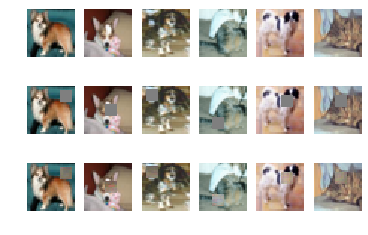

251 [D loss: 0.694642, acc: 50.00%] [G loss: 0.212411, mse: 0.211929]
252 [D loss: 0.695102, acc: 46.09%] [G loss: 0.170766, mse: 0.170242]
253 [D loss: 0.695357, acc: 48.44%] [G loss: 0.238118, mse: 0.237661]
254 [D loss: 0.695190, acc: 44.53%] [G loss: 0.192972, mse: 0.192470]
255 [D loss: 0.696082, acc: 48.44%] [G loss: 0.225572, mse: 0.225102]
256 [D loss: 0.695274, acc: 49.22%] [G loss: 0.211404, mse: 0.210921]
257 [D loss: 0.694975, acc: 51.56%] [G loss: 0.190191, mse: 0.189687]
258 [D loss: 0.695553, acc: 46.09%] [G loss: 0.174909, mse: 0.174389]
259 [D loss: 0.695622, acc: 57.03%] [G loss: 0.226361, mse: 0.225893]
260 [D loss: 0.695228, acc: 48.44%] [G loss: 0.241985, mse: 0.241532]
261 [D loss: 0.695628, acc: 49.22%] [G loss: 0.168076, mse: 0.167549]
262 [D loss: 0.696034, acc: 45.31%] [G loss: 0.164042, mse: 0.163512]
263 [D loss: 0.695619, acc: 50.78%] [G loss: 0.273622, mse: 0.273201]
264 [D loss: 0.694839, acc: 48.44%] [G loss: 0.193534, mse: 0.193033]
265 [D loss: 0.69525

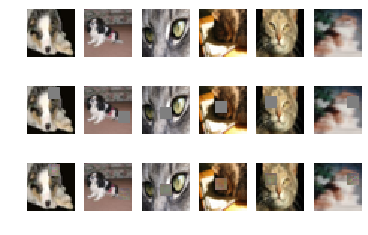

301 [D loss: 0.694720, acc: 50.00%] [G loss: 0.209992, mse: 0.209507]
302 [D loss: 0.694394, acc: 41.41%] [G loss: 0.198481, mse: 0.197985]
303 [D loss: 0.695079, acc: 44.53%] [G loss: 0.211670, mse: 0.211187]
304 [D loss: 0.694437, acc: 51.56%] [G loss: 0.199310, mse: 0.198815]
305 [D loss: 0.694942, acc: 52.34%] [G loss: 0.202834, mse: 0.202342]
306 [D loss: 0.694749, acc: 48.44%] [G loss: 0.203739, mse: 0.203248]
307 [D loss: 0.694992, acc: 48.44%] [G loss: 0.204297, mse: 0.203806]
308 [D loss: 0.694662, acc: 43.75%] [G loss: 0.198145, mse: 0.197649]
309 [D loss: 0.694490, acc: 51.56%] [G loss: 0.212470, mse: 0.211989]
310 [D loss: 0.694726, acc: 50.78%] [G loss: 0.189547, mse: 0.189042]
311 [D loss: 0.695460, acc: 46.88%] [G loss: 0.220604, mse: 0.220130]
312 [D loss: 0.694864, acc: 52.34%] [G loss: 0.172041, mse: 0.171518]
313 [D loss: 0.695941, acc: 51.56%] [G loss: 0.187639, mse: 0.187131]
314 [D loss: 0.695004, acc: 49.22%] [G loss: 0.260371, mse: 0.259936]
315 [D loss: 0.69532

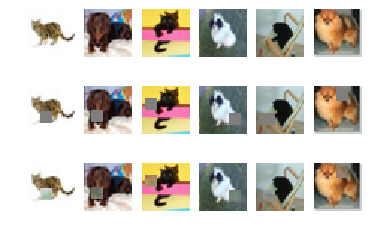

351 [D loss: 0.694304, acc: 46.09%] [G loss: 0.213447, mse: 0.212966]
352 [D loss: 0.694697, acc: 42.97%] [G loss: 0.213358, mse: 0.212877]
353 [D loss: 0.694763, acc: 42.97%] [G loss: 0.236990, mse: 0.236533]
354 [D loss: 0.694734, acc: 47.66%] [G loss: 0.225676, mse: 0.225207]
355 [D loss: 0.694269, acc: 54.69%] [G loss: 0.231724, mse: 0.231262]
356 [D loss: 0.694838, acc: 52.34%] [G loss: 0.211476, mse: 0.210993]
357 [D loss: 0.694533, acc: 50.78%] [G loss: 0.166971, mse: 0.166444]
358 [D loss: 0.694453, acc: 46.88%] [G loss: 0.179410, mse: 0.178895]
359 [D loss: 0.694898, acc: 46.88%] [G loss: 0.179380, mse: 0.178865]
360 [D loss: 0.694488, acc: 48.44%] [G loss: 0.251196, mse: 0.250753]
361 [D loss: 0.694519, acc: 40.62%] [G loss: 0.207968, mse: 0.207482]
362 [D loss: 0.694667, acc: 46.88%] [G loss: 0.228050, mse: 0.227584]
363 [D loss: 0.694551, acc: 47.66%] [G loss: 0.170645, mse: 0.170121]
364 [D loss: 0.694325, acc: 50.00%] [G loss: 0.208478, mse: 0.207993]
365 [D loss: 0.69426

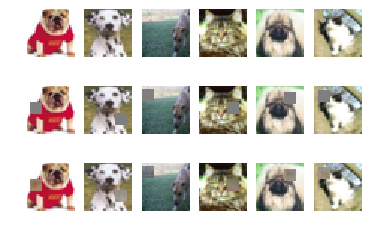

401 [D loss: 0.694652, acc: 54.69%] [G loss: 0.219110, mse: 0.218635]
402 [D loss: 0.694459, acc: 41.41%] [G loss: 0.157199, mse: 0.156662]
403 [D loss: 0.694444, acc: 48.44%] [G loss: 0.209207, mse: 0.208722]
404 [D loss: 0.694062, acc: 49.22%] [G loss: 0.187769, mse: 0.187263]
405 [D loss: 0.694432, acc: 56.25%] [G loss: 0.209490, mse: 0.209006]
406 [D loss: 0.694458, acc: 53.12%] [G loss: 0.220777, mse: 0.220304]
407 [D loss: 0.694946, acc: 53.12%] [G loss: 0.233577, mse: 0.233116]
408 [D loss: 0.694395, acc: 51.56%] [G loss: 0.234594, mse: 0.234134]
409 [D loss: 0.694547, acc: 52.34%] [G loss: 0.232791, mse: 0.232329]
410 [D loss: 0.694127, acc: 46.09%] [G loss: 0.167963, mse: 0.167437]
411 [D loss: 0.694091, acc: 42.19%] [G loss: 0.195078, mse: 0.194579]
412 [D loss: 0.694246, acc: 48.44%] [G loss: 0.180870, mse: 0.180357]
413 [D loss: 0.694164, acc: 50.00%] [G loss: 0.199658, mse: 0.199164]
414 [D loss: 0.694237, acc: 56.25%] [G loss: 0.197765, mse: 0.197268]
415 [D loss: 0.69449

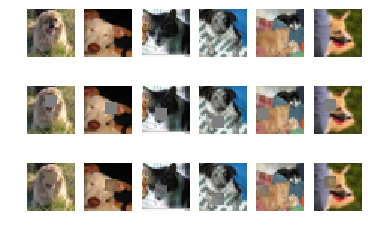

451 [D loss: 0.694064, acc: 53.91%] [G loss: 0.185263, mse: 0.184754]
452 [D loss: 0.694516, acc: 47.66%] [G loss: 0.197829, mse: 0.197333]
453 [D loss: 0.694450, acc: 42.19%] [G loss: 0.181725, mse: 0.181212]
454 [D loss: 0.694564, acc: 46.09%] [G loss: 0.217165, mse: 0.216688]
455 [D loss: 0.694582, acc: 48.44%] [G loss: 0.181588, mse: 0.181075]
456 [D loss: 0.694234, acc: 44.53%] [G loss: 0.173859, mse: 0.173339]
457 [D loss: 0.694388, acc: 42.97%] [G loss: 0.185488, mse: 0.184979]
458 [D loss: 0.694115, acc: 52.34%] [G loss: 0.179477, mse: 0.178963]
459 [D loss: 0.694061, acc: 50.00%] [G loss: 0.188623, mse: 0.188118]
460 [D loss: 0.694125, acc: 46.88%] [G loss: 0.165047, mse: 0.164518]
461 [D loss: 0.694407, acc: 53.12%] [G loss: 0.162513, mse: 0.161981]
462 [D loss: 0.694556, acc: 46.09%] [G loss: 0.216864, mse: 0.216386]
463 [D loss: 0.694484, acc: 48.44%] [G loss: 0.196449, mse: 0.195951]
464 [D loss: 0.694095, acc: 53.12%] [G loss: 0.213730, mse: 0.213250]
465 [D loss: 0.69402

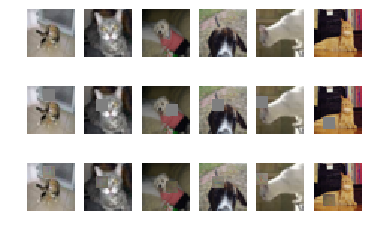

501 [D loss: 0.694069, acc: 50.00%] [G loss: 0.176371, mse: 0.175854]
502 [D loss: 0.693845, acc: 50.78%] [G loss: 0.195695, mse: 0.195197]
503 [D loss: 0.693874, acc: 50.78%] [G loss: 0.229763, mse: 0.229299]
504 [D loss: 0.694144, acc: 51.56%] [G loss: 0.236409, mse: 0.235951]
505 [D loss: 0.694243, acc: 52.34%] [G loss: 0.191391, mse: 0.190888]
506 [D loss: 0.694270, acc: 50.78%] [G loss: 0.173893, mse: 0.173373]
507 [D loss: 0.694063, acc: 47.66%] [G loss: 0.198624, mse: 0.198129]
508 [D loss: 0.694151, acc: 52.34%] [G loss: 0.174020, mse: 0.173500]
509 [D loss: 0.694039, acc: 51.56%] [G loss: 0.197303, mse: 0.196807]
510 [D loss: 0.694254, acc: 48.44%] [G loss: 0.191185, mse: 0.190682]
511 [D loss: 0.693873, acc: 51.56%] [G loss: 0.200963, mse: 0.200470]
512 [D loss: 0.694059, acc: 44.53%] [G loss: 0.196509, mse: 0.196011]
513 [D loss: 0.694058, acc: 54.69%] [G loss: 0.230379, mse: 0.229915]
514 [D loss: 0.693961, acc: 53.91%] [G loss: 0.192848, mse: 0.192346]
515 [D loss: 0.69416

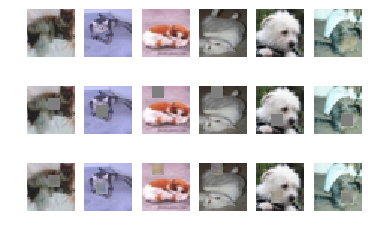

551 [D loss: 0.694649, acc: 56.25%] [G loss: 0.193373, mse: 0.192872]
552 [D loss: 0.694927, acc: 49.22%] [G loss: 0.206716, mse: 0.206229]
553 [D loss: 0.694423, acc: 45.31%] [G loss: 0.191845, mse: 0.191343]
554 [D loss: 0.694181, acc: 50.78%] [G loss: 0.158135, mse: 0.157599]
555 [D loss: 0.694159, acc: 43.75%] [G loss: 0.195372, mse: 0.194873]
556 [D loss: 0.694015, acc: 55.47%] [G loss: 0.197998, mse: 0.197502]
557 [D loss: 0.694483, acc: 48.44%] [G loss: 0.163977, mse: 0.163447]


KeyboardInterrupt: 

In [130]:
class ContextEncoder(object):
    def __init__(self, discriminator, generator):
        self.img_rows = 32
        self.img_cols = 32
        self.mask_height = 8
        self.mask_width = 8
        self.channels = 3
        self.num_classes = 2
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.missing_shape = (self.mask_height, self.mask_width, self.channels)
        
        # Load discriminator
        self.optimizer = tf.keras.optimizers.Adam(0.0002, .5)
        
        missing_img = tf.keras.Input(shape=self.missing_shape)
        self.discriminator = Model(missing_img, discriminator(missing_img))
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=self.optimizer,
                                   metrics=['accuracy'])
        
        # Load generator
        self.generator = generator
        
        #  The generator takes noise as input and generates the missing
        # part of the image
        masked_img = tf.keras.layers.Input(shape=self.img_shape)
        gen_missing = self.generator(masked_img)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines
        # if it is generated or if it is a real image
        valid = self.discriminator(gen_missing)
        
        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = tf.keras.Model(masked_img , [gen_missing, valid])
        self.combined.compile(loss=['mse', 'binary_crossentropy'],
            loss_weights=[0.999, 0.001],
            optimizer=self.optimizer)

    def mask_randomly(self, imgs):
        y1 = np.random.randint(0, self.img_rows - self.mask_height, imgs.shape[0])
        y2 = y1 + self.mask_height
        x1 = np.random.randint(0, self.img_rows - self.mask_width, imgs.shape[0])
        x2 = x1 + self.mask_width

        masked_imgs = np.empty_like(imgs)
        missing_parts = np.empty((imgs.shape[0], self.mask_height, self.mask_width, self.channels))
        for i, img in enumerate(imgs):
            masked_img = img.copy()
            _y1, _y2, _x1, _x2 = y1[i], y2[i], x1[i], x2[i]
            missing_parts[i] = masked_img[_y1:_y2, _x1:_x2, :].copy()
            masked_img[_y1:_y2, _x1:_x2, :] = 0
            masked_imgs[i] = masked_img

        return masked_imgs, missing_parts, (y1, y2, x1, x2)



    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()

        # Extract dogs and cats
        X_cats = X_train[(y_train == 3).flatten()]
        X_dogs = X_train[(y_train == 5).flatten()]
        X_train = np.vstack((X_cats, X_dogs))

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        y_train = y_train.reshape(-1, 1)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            masked_imgs, missing_parts, _ = self.mask_randomly(imgs)

            # Generate a batch of new images
            gen_missing = self.generator.predict(masked_imgs)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(missing_parts, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_missing, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.combined.train_on_batch(masked_imgs, [missing_parts, valid])

            # Plot the progress
            print ("%d [D loss: %f, acc: %.2f%%] [G loss: %f, mse: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0], g_loss[1]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                idx = np.random.randint(0, X_train.shape[0], 6)
                imgs = X_train[idx]
                self.sample_images(epoch, imgs)

    def sample_images(self, epoch, imgs):
        r, c = 3, 6

        masked_imgs, missing_parts, (y1, y2, x1, x2) = self.mask_randomly(imgs)
        gen_missing = self.generator.predict(masked_imgs)

        imgs = 0.5 * imgs + 0.5
        masked_imgs = 0.5 * masked_imgs + 0.5
        gen_missing = 0.5 * gen_missing + 0.5

        fig, axs = plt.subplots(r, c)
        for i in range(c):
            axs[0,i].imshow(imgs[i, :,:])
            axs[0,i].axis('off')
            axs[1,i].imshow(masked_imgs[i, :,:])
            axs[1,i].axis('off')
            filled_in = imgs[i].copy()
            filled_in[y1[i]:y2[i], x1[i]:x2[i], :] = gen_missing[i]
            axs[2,i].imshow(filled_in)
            axs[2,i].axis('off')
        plt.show()

    def save_model(self):

        def save(model, model_name):
            model_path = "saved_model/%s.json" % model_name
            weights_path = "saved_model/%s_weights.hdf5" % model_name
            options = {"file_arch": model_path,
                        "file_weight": weights_path}
            json_string = model.to_json()
            open(options['file_arch'], 'w').write(json_string)
            model.save_weights(options['file_weight'])

        save(self.generator, "generator")
        save(self.discriminator, "discriminator")


context_encoder = ContextEncoder(Discriminator(), Generator(Encoder(), Decoder()))
context_encoder.train(epochs=30000, batch_size=64, sample_interval=50)
        